# **Selección del Dataset y algunas consideraciones**

El dataset elegido se trata de la librería de juegos de la plataforma Steam con sus respectivos estudios, valoraciones, media de horas de juego, promedio de horas de juego entre otra información de interés.

La utilización de este dataset permitirá plantear alguna hipótesis y preguntas considerando algunas de las variables anteriormente mencionadas y la relación entre las mismas.

La última fecha de actualización del dataset es mayo 2019 pero a los efectos de las hipótesis que se plantearán, resulta irrelevante qué tan actualizada está la información.


# **Motivación**

La elaboración del dataset y la información contenida en el mismo permite el análisis de la industria del gaming, más específicamente desde el catálogo de Steam y sus míles de títulos. El planteo de múltiples preguntas como cuáles son los juegos más jugados en horas promedio, cuáles son los estudios que cuentan con más títulos en la plataforma de Steam, qué relación hay entre las valoraciones positivas de un juego y su respectivo precio, o como evolucionan los precios dentro del catálogo de un estudio con el paso de los años, entre otras tantas hipótesis que es posible plantear y responder utilizando este dataset.




# **Audiencia**

Este dataset contiene información de gran utilidad para todas aquellas organizaciones que elaboran, distribuyen y/o analizan software relativo al gaming, ya que del mismo se puede obtener información relativa a precios, tendencias de compra, actividad por género, por estudio, cantidad de horas promedio, media de horas y otros.
La utilización de estos datos resulta de utilidad al momento de fijar precios o acuerdos de contrato con la plataforma de Steam al momento de publicar un juego o en mayor escala un catálogo de un estudio con distintos títulos y propuestas.

# **Hipótesis y preguntas**



*   Hipótesis 1: los estudios con más juegos lanzados por año son los que acumulan más horas de juego promedio.

*   Hipótesis 2: el precio promedio de la librería aumenta anualmente.

*   Hipótesis 3: los juegos con más valoraciones positivas son los más caros.

Las preguntas específicas con relación al dataset se irán desprendiendo a medida que vayamos visualizando resultados.






In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Definiendo estilo:

# mpl.style.use('seaborn-pastel')

# Lectura de dataset:

st = pd.read_csv('steam.csv')

# Variable extra:

xtst = st

# Agrego columna Year al df para ser utilizada en más de un gráfico

st['release_date'] = pd.to_datetime(st['release_date'])
st['Year'] = st['release_date'].dt.year

st.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Year
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,2000
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,1999
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,2003
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,2001
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,1999


In [2]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   appid             27075 non-null  int64         
 1   name              27075 non-null  object        
 2   release_date      27075 non-null  datetime64[ns]
 3   english           27075 non-null  int64         
 4   developer         27075 non-null  object        
 5   publisher         27075 non-null  object        
 6   platforms         27075 non-null  object        
 7   required_age      27075 non-null  int64         
 8   categories        27075 non-null  object        
 9   genres            27075 non-null  object        
 10  steamspy_tags     27075 non-null  object        
 11  achievements      27075 non-null  int64         
 12  positive_ratings  27075 non-null  int64         
 13  negative_ratings  27075 non-null  int64         
 14  average_playtime  2707

## Resumen de Metadata

In [113]:
# pip install ydata_profiling

from ydata_profiling import ProfileReport

repo = ProfileReport(st, title = 'Steam Library')

repo

ModuleNotFoundError: ignored

# Hipótesis 1: los estudios con más juegos lanzados son los que acumulan más horas de juego promedio.

**Cuáles son los estudios con más horas de juego promedio?**

In [3]:
# Ordeno las columnas que serán utilizadas para la gráfica, reduzco la cantidad de registros en función de la cantidad de horas considerando los resultados por encima de las 15000 horas

avg_ptm = st.groupby('publisher')['average_playtime'].sum().reset_index()

gen = avg_ptm[avg_ptm['average_playtime'] > 15000]

gen = gen.sort_values('average_playtime', ascending = False)

gen.head(30)

,publisher,average_playtime
7307,Manuel Pazos;Daniel Celemín,190625
11058,Square Enix,126238
12414,Ubisoft,106167
12625,Valve,105153
12681,Versus Evil,99858
13692,dosowisko.net,95242
13314,YETU GAME,63498
10196,SEGA,59749
9286,Portalarium,54618
8805,Paradox Interactive,50887


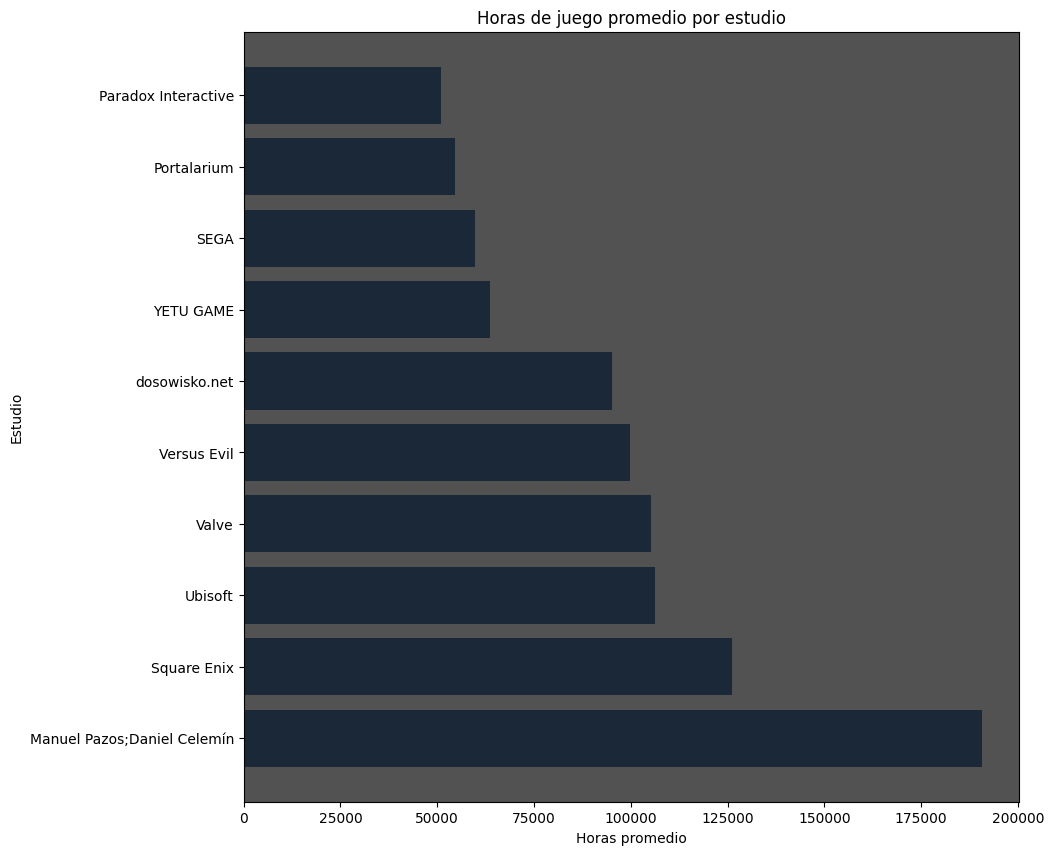

In [4]:
#Armo gráfica:

gen = gen.nlargest(10, columns=['average_playtime'])
g = gen['publisher']
h = gen['average_playtime']
cuscol = "#1B2838"

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('Horas promedio')
ax.set_ylabel('Estudio')
ax.set_title('Horas de juego promedio por estudio')
ax.set_facecolor('#525252')
ax.barh(g,h, color = cuscol);

**Cómo es posible que Manuel Pazos; Daniel Celemín tengan más horas de juego promedio que las grandes compañías?**

In [5]:
# Busco los juegos del estudio mencionado para ver cómo se reparten las horas:

avg_ptm = st.groupby(['publisher', 'name', 'positive_ratings'])['average_playtime'].sum().reset_index()

avg_ptm = avg_ptm[avg_ptm['publisher'] == 'Manuel Pazos;Daniel Celemín']

avg_ptm

,publisher,name,positive_ratings,average_playtime
14115,Manuel Pazos;Daniel Celemín,The Abbey of Crime Extensum,146,190625


**En vista de que se trata de un título desconocido y considerando especialmente que solamente cuenta con 146 reseñas positivas, podemos concluir que al momento de analizar la gráfica anterior, este estudio claramente se debe considerar un outlier.**

**Se revisan otros posibles outliers y se realiza una limpieza del dataset para contar con información más precisa:**

In [6]:
# Defino outliers a ser eliminados
stout = ['Manuel Pazos;Daniel Celemín','dosowisko.net','Versus Evil','YETU GAME','Portalarium',]

# st = st[st.publisher.isin(stout) == False]

# stout
stdb = gen[gen["publisher"].str.contains("Manuel Pazos;Daniel Celemín|dosowisko.net|Versus Evil|YETU GAME|Portalarium") == False]

stdb

,publisher,average_playtime
11058,Square Enix,126238
12414,Ubisoft,106167
12625,Valve,105153
10196,SEGA,59749
8805,Paradox Interactive,50887


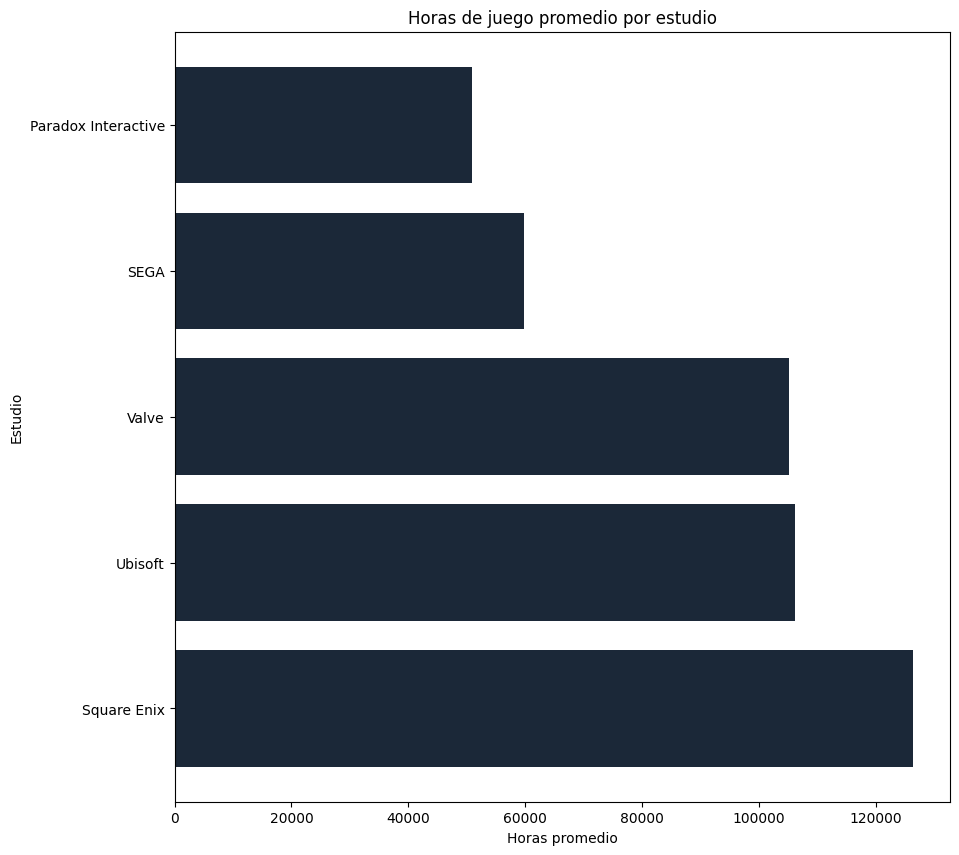

In [7]:
#Armo gráfica post limpieza de datos

stdb = stdb.nlargest(10, columns=['average_playtime'])
g = stdb['publisher']
h = stdb['average_playtime']

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('Horas promedio')
ax.set_ylabel('Estudio')
ax.set_title('Horas de juego promedio por estudio')
ax.barh(g,h, color = cuscol);

In [8]:
# Top 5 de los publishers con más títulos lanzados:

tfp = st.groupby('publisher').size().reset_index(name = 'Count')
tfp = tfp.nlargest(5 , 'Count')

tfp

,publisher,Count
1440,Big Fish Games,212
11243,Strategy First,136
12414,Ubisoft,111
11530,THQ Nordic,98
11058,Square Enix,97


**Cuáles son los estudios con más juegos publicados?**

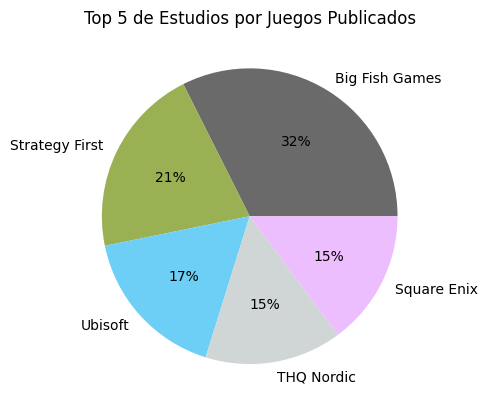

In [9]:
colors = sns.color_palette()
plt.pie(tfp['Count'], labels = tfp['publisher'], colors = ['#6A6A6A','#99B053','#6DCFF6','#D0D5D6', '#ECBEFD'], autopct='%.0f%%')
plt.title('Top 5 de Estudios por Juegos Publicados')
plt.show()

**Conclusión: Comparando ambas gráficas, debería haber una coincidencia mayoritaria entre los valores top 5-10 de ambas para respaldar el cumplimiento de la hipótesis planteada. No obstante, la cantidad de estudios con más juegos publicados que se pueden apreciar en la segunda gráfica, no coinciden con los estudios con más horas de juego promedio que se aprecian en la primera gráfica (solamente hay una coincidencia en 2 elementos). Es por esto que se puede concluir que la hipótesis planteada inicialmente para este caso no se cumple.**

# Hipótesis 2: el precio promedio de la librería aumenta anualmente.

**Existe un aumento sostenido del precio promedio año a año?**

In [10]:
spy = st.groupby('Year')['price'].mean().reset_index(name = 'Price')

spy

,Year,Price
0,1997,5.990000
1,1998,7.190000
2,1999,3.990000
3,2000,5.590000
4,2001,1.995000
5,2002,7.990000
6,2003,2.993333
7,2004,5.758333
8,2005,4.026667
9,2006,7.558542


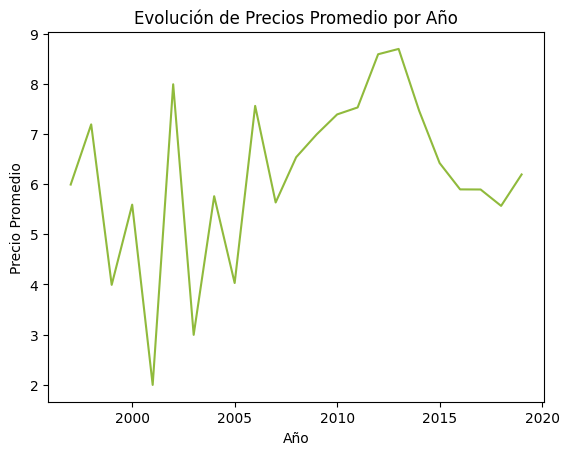

In [11]:
coline = '#90BA3C'
sns.lineplot(x = "Year", y = "Price", data = spy, color = coline).set(title='Evolución de Precios Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Precio Promedio');

**Conclusión: Para que la hipótesis planteada en este caso se cumpla, debería existir un crecimiento lineal sostenido en el eje 'y' de precios promedio. La existencia de picos en la gráfica más allá de los valores apreciados en la tabla generada para la realización del gráfico muestran altibajos pronunciados en los precios promedio a pesar de que en algunos periodos parece haber un crecimiento sostenido que eventualmente vuelve a bajar. La existencia de dichos altibajos indican que claramente, esta hipótesis no se cumple.**

# Hipótesis 3: los juegos más caros tienen más valoraciones positivas.

**Existe una relación directa entre el precio de un juego y sus valoraciones positivas?**

<ipython-input-12-2f28c01aa4c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sct['Géneros'] = sct['Géneros'].str.split(';')


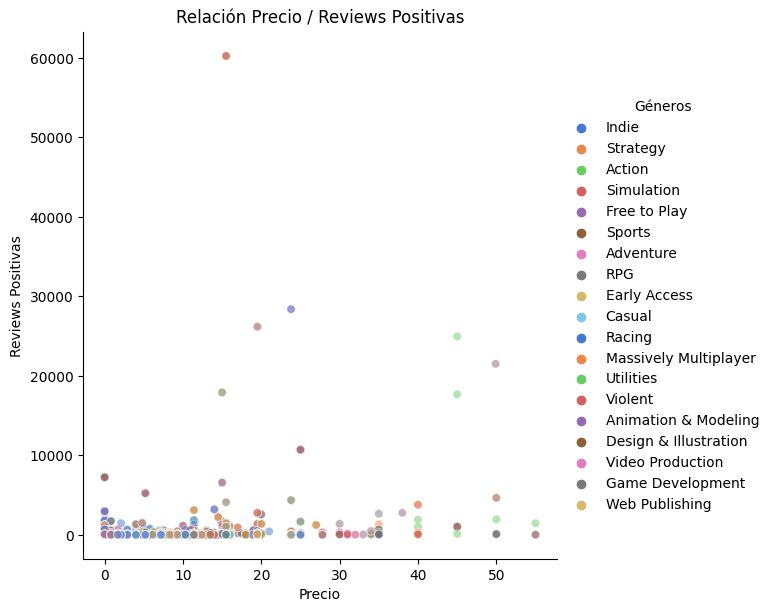

In [12]:
sct = st
sct.rename(columns={'genres': 'Géneros'}, inplace=True)
sct = st[st['Year'] == 2019]
sct['Géneros'] = sct['Géneros'].str.split(';')
sct = sct.explode('Géneros')

sns.relplot(x="price", y="positive_ratings", hue="Géneros", sizes=(40, 400), alpha=.5, palette="muted", height=6, data=sct)
plt.title('Relación Precio / Reviews Positivas')
plt.xlabel('Precio')
plt.ylabel('Reviews Positivas');

**Conclusión: no parece haber una relación directa entre el precio de un juego y la cantidad de valoraciones positivas del mismo, ya que de ser así, se apreciaría una mayor concentración de valores sobre el lado derecho de la gráfica con puntos más altos que el sector izquierdo. En cambio, se nota claramente un nivel parejo de reseñas positivas en el eje 'y' a lo largo del eje 'x' con algunas pocas excepciones que no hacen una diferencia significativa como para poder concluir el cumplimiento de la hipótesis a la que hace referencia esta gráfica. No se puede asegurar que a mayor precio del juego la cantidad de reseñas positivas es mayor, por lo tanto la hipótesis no se cumple.**

# **Recomendaciones, problemática y contexto**

Este set de datos resulta de enorme utilidad al momento de analizar un contexto de altísima competencia entre los estudios más fuertes y sus títulos de cabecera, y también otros estudios menores y/o independientes con títulos que resultan ser grandes éxitos en comparación con títulos que contaron con un presupuesto mayor y más recursos.

El tener la posibilidad de analizar el comportamiento de los usuarios de la plataforma de Steam al momento de comprar y evaluar los títulos que compran permite estudiar las tendencias y las variaciones (y en algunos casos la relación entre sí) para elaborar campañas de marketing y visibilidad más sólidas y con información más clara.

En una industria que crece constantemente como lo es la del gaming, es fundamental contar con información limpia, ordenada y precisa para entender el comportamiento del mercado y sus usuarios.

Se recomienda el estudio en profundidad de las valoraciones positivas/negativas de los títulos, la comparación de precios con títulos similares de otros estudios y entender de qué manera los usuarios de la plataforma se manejan al momento de elegir un género, un título o un estudio.

## Integración con API

Se hace uso de la API de RAWG Games Database con el fin de obtener información de todos los juegos calificados por RAWG y contrastar dicha información con las calificaciones recibidas en la plataforma de Steam.

In [14]:
# Para utilizar esta API fue necesario realizar autenticación con RAWG y así obtener un token de acceso.

url = 'https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff'

# Verificamos conexión con la API:
resp = requests.get(url)
print(resp)

data = resp.json()

<Response [200]>


In [15]:
# La API tiene la información divida por páginas y por lo tanto fue necesario crear un loop para obtener
# los datos página por página.

lista = []

try:

  while url:
    print('~~~~~~~~~~~~~')
    print('Obteniendo datos...', url)

    resp = requests.get(url)
    data = resp.json()

    lista.extend(data['results'])

    url = data['next']

except json.decoder.JSONDecodeError:
   print('Obtención de datos finalizada.')

~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff
~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff&page=2
~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff&page=3
~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff&page=4
~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff&page=5
~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff&page=6
~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff&page=7
~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff&page=8
~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff&page=9
~~~~~~~~~~~~~
Obteniendo datos... h

KeyboardInterrupt: ignored

In [16]:
# Utilizamos Pandas para crear un DF con el JSON obtenido de la API:

jsondata = lista
df = pd.DataFrame.from_dict(jsondata)
df.head()

newdata = df[['name','rating']].copy()
print(newdata)

                                 name  rating
0                  Grand Theft Auto V    4.47
1            The Witcher 3: Wild Hunt    4.66
2                            Portal 2    4.61
3                  Tomb Raider (2013)    4.05
4    Counter-Strike: Global Offensive    3.57
..                                ...     ...
415  Star Wars: Battlefront II (2005)    4.21
416                 Heroes & Generals    2.79
417                     Mass Effect 3    4.40
418                     Binary Domain    3.55
419                             Stray    4.17

[420 rows x 2 columns]


In [17]:
# El sistema de rating de RAWG obtenido con la API es una escala de likert de 1 a 5.
# El sistema de rating de Steam está basado en ratings positivas vs ratings negativas.
# Teniendo en cuenta que para poder comparar las ratings las mismas deberían estar en la misma escala
# se planteó una regla de 3 para dar un valor porcentual a las valoraciones de Steam y posteriormente convertirlas a una escala
# de 1 a 5 como la de RAWG.

preperc = (st['positive_ratings'] + st['negative_ratings'])

column_names = ["lasuma"]
nprep = pd.DataFrame(preperc, columns = column_names)

nprep = nprep.loc[nprep['lasuma'] > 1 ]
nprep['lasuma'] = nprep['lasuma'].astype(float)
cprep = (st['positive_ratings'] * 100) / nprep['lasuma']
cprep = cprep.dropna()

print(cprep)

0         97.388815
1         83.978740
2         89.564761
3         82.662338
4         94.799567
            ...    
27069     50.000000
27070    100.000000
27071     88.888889
27073    100.000000
27074    100.000000
Length: 26061, dtype: float64


In [18]:
# Para crear la escala de 1 a 5 se utilizó la regla para dar valores porcentuales y se definió una franja separada cada 20%
# logrando 5 franjas de 20% (1 a 5).

cname = ['Steam 1 to 5']
stof = pd.DataFrame(cprep, columns = cname)

stof.loc[(stof['Steam 1 to 5'] > 0) & (stof['Steam 1 to 5'] <= 20)] = 1
stof.loc[(stof['Steam 1 to 5'] > 20) & (stof['Steam 1 to 5'] <= 40)] = 2
stof.loc[(stof['Steam 1 to 5'] > 40) & (stof['Steam 1 to 5'] <= 60)] = 3
stof.loc[(stof['Steam 1 to 5'] > 60) & (stof['Steam 1 to 5'] <= 80)] = 4
stof.loc[(stof['Steam 1 to 5'] > 80) & (stof['Steam 1 to 5'] <= 100)] = 5

In [19]:
# Se agregan las nuevas columnas al Dataset principal para presentar la información:

st['Steam 1 to 5'] = stof['Steam 1 to 5']
st['Name2'] = newdata['name']
st['Rating2'] = newdata['rating']

st.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,Géneros,...,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Year,Steam 1 to 5,Name2,Rating2
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,124534,3339,17612,317,10000000-20000000,7.19,2000,5.0,Grand Theft Auto V,4.47
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,3318,633,277,62,5000000-10000000,3.99,1999,5.0,The Witcher 3: Wild Hunt,4.66
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,3416,398,187,34,5000000-10000000,3.99,2003,5.0,Portal 2,4.61
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,1273,267,258,184,5000000-10000000,3.99,2001,5.0,Tomb Raider (2013),4.05
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,5250,288,624,415,5000000-10000000,3.99,1999,5.0,Counter-Strike: Global Offensive,3.57


In [20]:
# Creamos un nuevo df con la información puntual que se utilizará para el análisis:
# Al contar con 2 columnas de juegos (una proveniente del dataset original y otra de la API) fue necesario unificar los datos
# para así obtener una columna única que contara con juegos puntuados tanto en Steam como en RAWG:

colnam = st[['name', 'Name2', 'Steam 1 to 5', 'Rating2']]

uniname = pd.merge(colnam[['name', 'Steam 1 to 5']],colnam[['Name2', 'Rating2']],left_on=['name'],right_on=['Name2'],how='left')

nuname = uniname.drop('Name2', axis=1)
nuname = nuname[nuname['Rating2'].notna()]
nuname.shape

nuname.head()

,name,Steam 1 to 5,Rating2
0,Counter-Strike,5.0,4.04
1,Team Fortress Classic,5.0,2.96
4,Half-Life: Opposing Force,5.0,3.85
6,Half-Life,5.0,4.40
7,Counter-Strike: Condition Zero,5.0,3.14


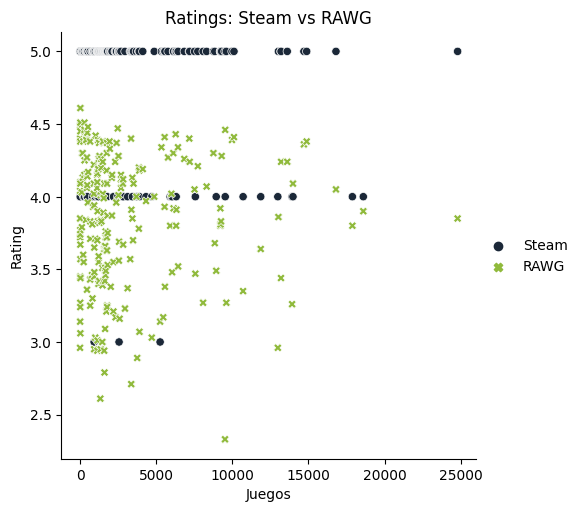

In [21]:
# Se realiza un diagrama de dispersión utilizando Seaborn:
nuname.rename(columns={'name': 'Juego', 'Steam 1 to 5' : 'Steam', 'Rating2' : 'RAWG'}, inplace=True)

colore = ["#1B2838", '#90BA3C']
sns.set_palette(sns.color_palette(colore))
scat = sns.relplot(data=nuname)
scat.set(title='Ratings: Steam vs RAWG')
scat.set_xlabels('Juegos')
scat.set_ylabels('Rating')
plt.show()

# Regresión lineal y ML

In [22]:
X = st[['positive_ratings', 'negative_ratings']]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   positive_ratings  27075 non-null  int64
 1   negative_ratings  27075 non-null  int64
dtypes: int64(2)
memory usage: 423.2 KB


In [23]:
y = st['price']

y

0        7.19
1        3.99
2        3.99
3        3.99
4        3.99
         ... 
27070    2.09
27071    1.69
27072    3.99
27073    5.19
27074    5.19
Name: price, Length: 27075, dtype: float64

## Splitting

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

In [25]:
X_train

,positive_ratings,negative_ratings
1807,1324,163
25093,25,79
8355,9,1
6151,267,86
21814,23,1
...,...,...
21575,15,0
5390,42530,4734
860,258,410
15795,48,8


In [26]:
X_test

,positive_ratings,negative_ratings
10506,6,3
26313,0,1
2622,264,99
1489,902,129
19949,6,11
...,...,...
5764,80,82
21825,8,0
6909,23,14
4772,118,51


## Construcción del modelo

### Regresión lineal (entrega)

In [27]:
rl = LinearRegression()
rl.fit(X_train, y_train)

LinearRegression()

In [28]:
# Entrenando el modelo

y_rl_train_pred = rl.predict(X_train)
y_rl_test_pred = rl.predict(X_test)

### Evaluación de performance

In [29]:
rl_train_mse = mean_squared_error(y_train, y_rl_train_pred)
rl_train_r2 = r2_score(y_train, y_rl_train_pred)

rl_test_mse = mean_squared_error(y_test, y_rl_test_pred)
rl_test_r2 = r2_score(y_test, y_rl_test_pred)

In [30]:
lresul = pd.DataFrame(['Regresión lineal', rl_train_mse, rl_train_r2, rl_test_mse, rl_test_r2]).transpose()
lresul.columns = ['Método', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

lresul

,Método,Training MSE,Training R2,Test MSE,Test R2
0,Regresión lineal,51.513911,0.006209,106.916531,-0.041111


### Visualización

Text(0.5, 0, 'Test Precio')

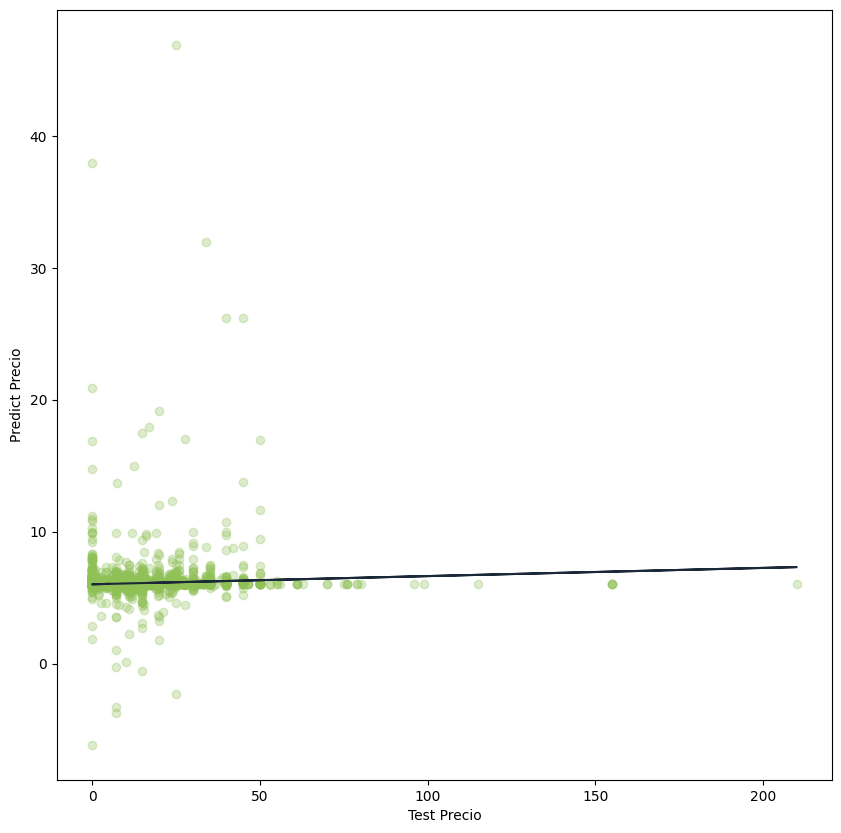

In [31]:
plt.figure(figsize=(10, 10))
plt.scatter(x = y_train, y = y_rl_train_pred, c = "#90C157", alpha = 0.3)

z = np.polyfit(y_train, y_rl_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#1B2838')
plt.ylabel('Predict Precio')
plt.xlabel('Test Precio')

## Creación de variable sintética

In [32]:
# Crearemos una variable sintética que haga referencia a las descargas de cada juego, generando para cada valor un número aleatorio entre 0 y 10 millones:

st['Downloads'] = np.random.randint(low=0, high=10000000, size=len(st))

st

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,Géneros,...,negative_ratings,average_playtime,median_playtime,owners,price,Year,Steam 1 to 5,Name2,Rating2,Downloads
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,3339,17612,317,10000000-20000000,7.19,2000,5.0,Grand Theft Auto V,4.47,9616369
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,633,277,62,5000000-10000000,3.99,1999,5.0,The Witcher 3: Wild Hunt,4.66,6182699
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,398,187,34,5000000-10000000,3.99,2003,5.0,Portal 2,4.61,4493085
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,267,258,184,5000000-10000000,3.99,2001,5.0,Tomb Raider (2013),4.05,8681708
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,288,624,415,5000000-10000000,3.99,1999,5.0,Counter-Strike: Global Offensive,3.57,9480779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,...,0,0,0,0-20000,2.09,2019,5.0,NaN,NaN,89311
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,...,1,0,0,0-20000,1.69,2019,5.0,NaN,NaN,1801185
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,...,1,0,0,0-20000,3.99,2019,NaN,NaN,NaN,42477
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,...,0,0,0,0-20000,5.19,2019,5.0,NaN,NaN,3401460


In [33]:
# Utilización de la variable sintética para el entrenamiento de ML y evaluación de performance:

sint = st[['positive_ratings', 'Downloads']]

prec = st['price']

# Splitting:

X_train, X_test, y_train, y_test = train_test_split(sint, prec, test_size =0.2, random_state = 42)

# Regresión lineal:

rl2 = LinearRegression()
rl2.fit(X_train, y_train)

# Entrenando el modelo

y_rl2_train_pred = rl2.predict(X_train)
y_rl2_test_pred = rl2.predict(X_test)

# Evaluación de performance:

from sklearn.metrics import mean_squared_error, r2_score

rl2_train_mse = mean_squared_error(y_train, y_rl2_train_pred)
rl2_train_r2 = r2_score(y_train, y_rl2_train_pred)

rl2_test_mse = mean_squared_error(y_test, y_rl2_test_pred)
rl2_test_r2 = r2_score(y_test, y_rl2_test_pred)

lresul2 = pd.DataFrame(['Regresión lineal', rl2_train_mse, rl2_train_r2, rl2_test_mse, rl2_test_r2]).transpose()
lresul2.columns = ['Método', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

lresul2

,Método,Training MSE,Training R2,Test MSE,Test R2
0,Regresión lineal,51.769652,0.001275,102.602326,0.000899


Text(0.5, 0, 'Test Precio')

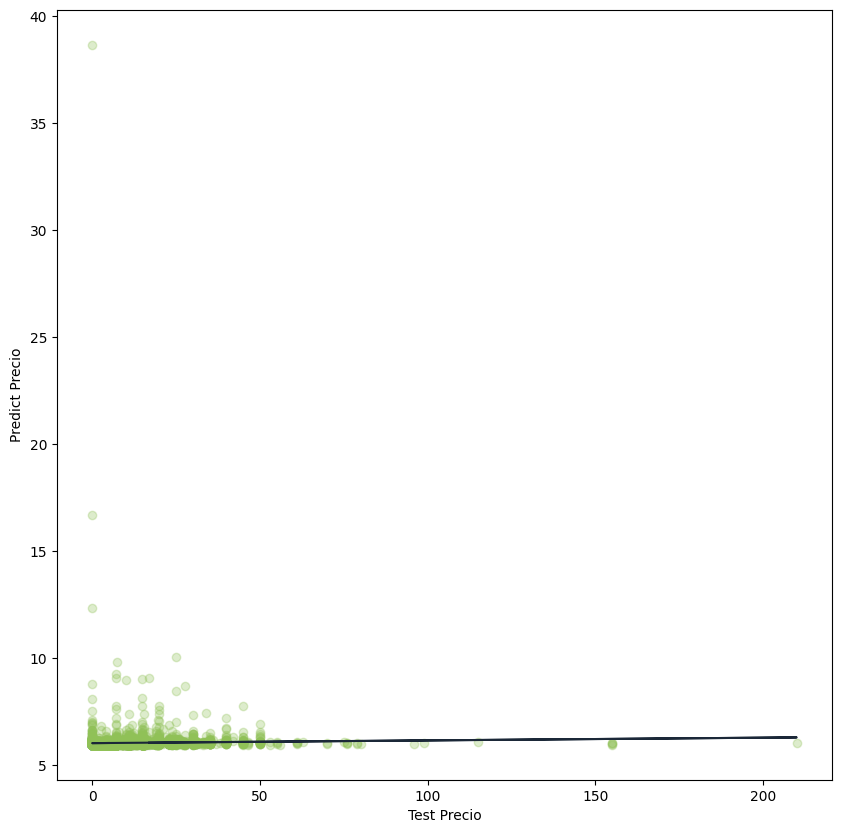

In [34]:
# Visualización:

plt.figure(figsize=(10, 10))
plt.scatter(x = y_train, y = y_rl2_train_pred, c = "#90C157", alpha = 0.3)

z = np.polyfit(y_train, y_rl2_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#1B2838')
plt.ylabel('Predict Precio')
plt.xlabel('Test Precio')

# Cross Validation

In [35]:
# Aplicación de Label Encoding:

st.rename(columns={'genres': 'Géneros'}, inplace=True)
st['Géneros'] = st['Géneros'].str.split(';')
st = st.explode('Géneros')

Ya = st.iloc[:,9:10]

Ya

,Géneros
0,Action
1,Action
2,Action
3,Action
4,Action
...,...
27073,Casual
27073,Indie
27074,Adventure
27074,Casual


In [36]:
laben = LabelEncoder()
laben.fit(Ya.values.ravel())
NYa = laben.transform(Ya.values.ravel())
LYa = pd.DataFrame(NYa, columns=['Géneros'])

LYa.head(25)

,Géneros
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [37]:
# Creación de modelo de clasificación con KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

In [38]:
# Aplicación de KFold Cross Validation

Xa = st[['positive_ratings', 'price']]

srs = cross_val_score(model, Xa, LYa.values.ravel(), cv=7, scoring= 'accuracy')
print('Accuracy en cada iteración:', srs)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Accuracy en cada iteración: [0.14069938 0.13219811 0.13247276 0.13586011 0.15005035 0.15481095
 0.16222649]


In [39]:
# Cálculo de accuracy promedio

avgacc = np.mean(srs)

print('Accuracy promedio:', avgacc)

Accuracy promedio: 0.14404545193788312


In [41]:
# Entrenando Decision Tree Classifier

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test).round(0)

dft = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(dft)

# Con mi modelo

print("R2 Score: " + str(r2_score(y_test, y_pred)))
print("MAE: " + str(mean_absolute_error(y_test, y_pred)))

       Actual  Predicted
10506    0.99        3.0
26313    7.19        1.0
2622     4.79        8.0
1489     5.99        7.0
19949    7.19        3.0
...       ...        ...
5764     0.00       10.0
21825    5.99        7.0
6909    14.99        2.0
4772    15.99       14.0
9845     3.99        6.0

[5415 rows x 2 columns]
R2 Score: -0.05408973128162109
MAE: 4.84933702677747


Como conclusión inmediata se puede observar que la accuracy es considerablemente baja al momento de predecir el género en función de las ratings positivas y el precio.

# Regresión Lineal y Decision Tree Classifier

In [97]:
# Del dataset original, extraigo las 5 filas con mayor tiempo de juego promedio

preost = xtst.sort_values("average_playtime",ascending=False)
ordst = preost.head(5)

ordst

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,Géneros,...,negative_ratings,average_playtime,median_playtime,owners,price,Year,Steam 1 to 5,Name2,Rating2,Downloads
9201,474030,The Abbey of Crime Extensum,2016-05-19,1,Manuel Pazos;Daniel Celemín,Manuel Pazos;Daniel Celemín,windows;mac;linux,0,Single-player,"[Adventure, Free to Play]",...,22,190625,190625,50000-100000,0.00,2016,5.0,NaN,NaN,2902735
1478,219340,The Banner Saga: Factions,2013-02-25,1,Stoic,Versus Evil,windows;mac,0,Multi-player;Cross-Platform Multiplayer,"[Free to Play, Indie, RPG, Strategy]",...,202,95245,190489,200000-500000,0.00,2013,4.0,NaN,NaN,5460712
6014,380140,The Secret of Tremendous Corporation,2015-10-12,1,Sebastian Krzyszkowiak;Konrad Burandt;Paweł Radej,dosowisko.net,windows;linux,0,Single-player;Captions available;Steam Cloud,"[Adventure, Casual, Free to Play, Indie]",...,50,95242,190445,100000-200000,0.00,2015,5.0,NaN,NaN,1228680
8969,465520,PRICE,2016-09-15,1,YETU GAME,YETU GAME,windows,0,Single-player;Steam Achievements;Steam Trading...,"[Adventure, Casual, Indie]",...,233,63481,63490,200000-500000,0.00,2016,5.0,NaN,NaN,1892507
3930,324510,Boundless,2018-09-11,1,Wonderstruck,Square Enix,windows;mac,0,Multi-player;Online Multi-Player;MMO;Co-op;Onl...,"[Action, Adventure, Indie, Massively Multiplay...",...,486,55204,55204,20000-50000,32.99,2018,4.0,NaN,NaN,3177999


In [98]:
# Convierto la columna release_date como objeto de fecha

xtst['release_date'] = pd.to_datetime(xtst['release_date'])
print(xtst.head(5))

   appid                       name release_date  english         developer  \
0     10             Counter-Strike   2000-11-01        1             Valve   
1     20      Team Fortress Classic   1999-04-01        1             Valve   
2     30              Day of Defeat   2003-05-01        1             Valve   
3     40         Deathmatch Classic   2001-06-01        1             Valve   
4     50  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   

  publisher          platforms  required_age  \
0     Valve  windows;mac;linux             0   
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                          categories   Géneros  ...  \
0  Multi-player;Online Multi-Player;Local Multi-P...  [Action]  ...   
1  Multi-player;Online Multi-Player;Local Multi-P...  [Action]  ...   
2              Multi-pl

In [99]:
# Obtención de X e Y

Xxt = xtst.average_playtime.values
Xxt

array([17612,   277,   187, ...,     0,     0,     0])

In [100]:
Yxt = xtst.median_playtime.values
Yxt

array([317,  62,  34, ...,   0,   0,   0])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

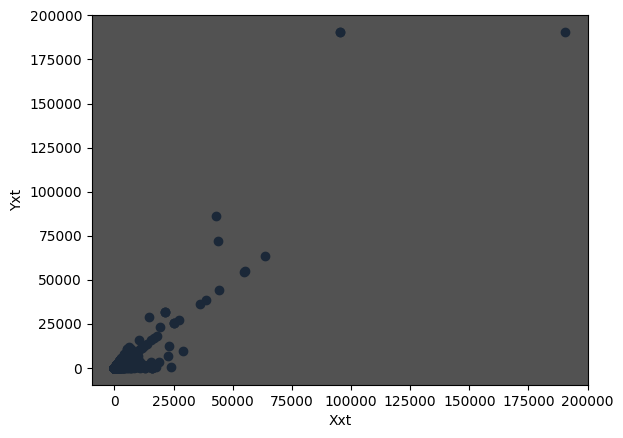

In [101]:
# Grafico

plt.scatter(Xxt, Yxt, color='#1B2838')
plt.xlabel("Xxt")
plt.ylabel("Yxt")
plt.rcParams['axes.facecolor'] = '#525252'
plt.plot

In [102]:
# Reshape de valores en X

xz = Xxt.reshape(-1,1)
xz,len(xz)

(array([[17612],
        [  277],
        [  187],
        ...,
        [    0],
        [    0],
        [    0]]),
 27075)

In [103]:
Xxt = Xxt.reshape(-1,1)

In [104]:
# Separando sets de training  y testing

Xxt_train, Xxt_test, Yxt_train, Yxt_test = train_test_split(Xxt,Yxt,train_size=0.8, random_state=600)

In [105]:
Xxt_train, len(Xxt_train)

(array([[  0],
        [399],
        [  0],
        ...,
        [  0],
        [215],
        [  0]]),
 21660)

In [70]:
Xxt_test, len(Xxt_test)

(array([[ 15],
        [  0],
        [  0],
        ...,
        [212],
        [289],
        [189]]),
 5415)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

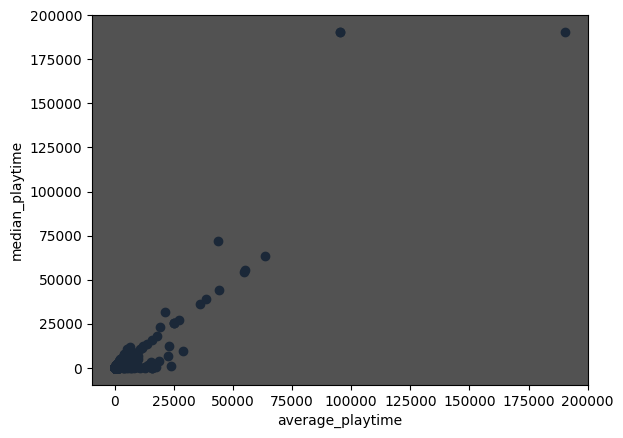

In [106]:
# Grafico data de training

plt.scatter(Xxt_train,Yxt_train, color='#1B2838')
plt.xlabel("average_playtime")
plt.ylabel("median_playtime")
plt.plot

In [107]:
xtlr = LinearRegression()
xtlr.fit(Xxt_train,Yxt_train)

LinearRegression()

In [108]:
# Cálculo de R Squared

xtlr.score(Xxt_train,Yxt_train)*100

84.32159609889997

In [109]:
# Predict de valores para testing

Yxt_predict = xtlr.predict(Xxt_test)
Yxt_predict

array([-14.3332529 , -31.87279286, -31.87279286, ..., 216.019372  ,
       306.05567716, 189.12541072])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

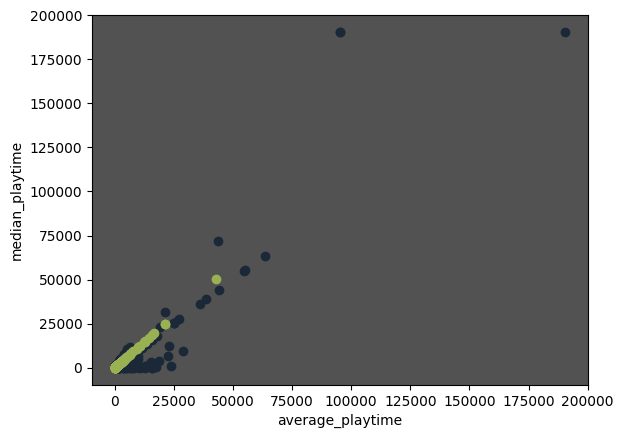

In [110]:
# Grafico training y predict

plt.scatter(Xxt_train,Yxt_train, color='#1B2838')
plt.scatter(Xxt_test,Yxt_predict, color='#99B053')
plt.xlabel("average_playtime")
plt.ylabel("median_playtime")
plt.plot

In [111]:
# Entrenando Decision Tree Classifier

xtregressor = RandomForestRegressor()
xtregressor.fit(Xxt_train, Yxt_train)
Yxt_pred = xtregressor.predict(Xxt_test).round(0)

xtdft = pd.DataFrame({'Actual': Yxt_test, 'Predicted': Yxt_pred})
print(xtdft)

# Con mi modelo

print("R2 Score:" + str(r2_score(Yxt_test, Yxt_pred)))
print("MAE:" + str(mean_absolute_error(Yxt_test, Yxt_pred)))

      Actual  Predicted
0         15       16.0
1          0        0.0
2          0        0.0
3          0        0.0
4          0        0.0
...      ...        ...
5410       0        0.0
5411       0        0.0
5412     264      219.0
5413     289      306.0
5414     189      206.0

[5415 rows x 2 columns]
R2 Score:0.791522939176143
MAE:53.37137580794091


**Las primeras conclusiones que se pueden obtener de la aplicación de modelos de ML y el análisis de las métricas para determinar la precisión de las predicciones son que el dataset no contiene información de gran utilidad para realizar predicciones utilizando sus variables. Al menos con el dataset completo y su volumen original de datos.**


# Aplicación de Regresión Lineal y Decision Tree Classifier sobre sample del dataset principal

La muestra contiene solamente los publishers con más cantidad de títulos, con el fin de eliminar múltiples registros que 'ensucian' el dataset y alteran la calidad de las predicciones realizadas con ML.

El dataset original cuenta con 27075 filas mientras la muestra cuenta con 1136.

In [112]:
# Se abre muestra del dataset principal

tpub = pd.read_csv('top pubs.csv')

tpub

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,267340,Beware Planet Earth,2014-04-11,1,Lightmare Studio,BANDAI NAMCO Entertainement,windows,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie;Strategy,Tower Defense;Strategy;Indie,33,177,80,0,0,50000-100000,6.99
1,202310,Ridge Racer™ Unbounded,2012-03-29,1,BUGBEAR,BANDAI NAMCO Entertainment,windows,0,Single-player;Steam Achievements;Partial Contr...,Racing,Racing;Arcade;Destruction,50,541,450,0,0,100000-200000,7.99
2,226780,MUD Motocross World Championship,2013-03-15,1,Milestone S.r.l.,BANDAI NAMCO Entertainment,windows,0,Single-player;Multi-player;Steam Achievements;...,Racing;Sports,Motocross;Racing;Motorbike,50,42,44,0,0,20000-50000,7.99
3,234670,NARUTO SHIPPUDEN: Ultimate Ninja STORM 3 Full ...,2013-10-24,1,CyberConnect2 Co. Ltd.,BANDAI NAMCO Entertainment,windows,0,Single-player;Multi-player;Online Multi-Player...,Action;Adventure,Anime;Fighting;Action,54,8209,882,1360,2404,500000-1000000,14.99
4,236450,PAC-MAN™ Championship Edition DX+,2013-09-24,1,"Mine Loader Software Co., Ltd.",BANDAI NAMCO Entertainment,windows,0,Single-player;Steam Achievements;Full controll...,Action,Arcade;Retro;Classic,12,5988,291,67,73,200000-500000,7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,942920,Kulzas Tomb,2018-09-27,1,Electric Root,VT Publishing,windows,0,Single-player,Action;Adventure;Casual,Action;Adventure;Casual,0,1,1,0,0,0-20000,3.99
1132,1018580,Magic Word Alchemist,2019-02-04,1,Virtual Bridgeworks,VT Publishing,windows,0,Single-player,Casual,Casual;Indie;Puzzle,0,2,0,0,0,0-20000,3.99
1133,1021700,Little Reds Forest Fun,2019-02-11,1,Virtual Bridgeworks,VT Publishing,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie;Strategy,Casual;Strategy;Adventure,1,4,0,0,0,0-20000,3.99
1134,1025940,Super Nitrous Zoomer,2019-02-14,1,Virtual Bridgeworks,VT Publishing,windows,0,Single-player,Action,Action;Indie;Casual,0,0,1,0,0,0-20000,3.99


In [113]:
# Del dataset original, extraigo las 5 filas con mayor tiempo de juego promedio

tpub = tpub.sort_values("average_playtime",ascending=False)
otpub = tpub.head(5)
otpub

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
1069,219340,The Banner Saga: Factions,2013-02-25,1,Stoic,Versus Evil,windows;mac,0,Multi-player;Cross-Platform Multiplayer,Free to Play;Indie;RPG;Strategy,Free to Play;Strategy;RPG,42,569,202,95245,190489,200000-500000,0.00
631,324510,Boundless,2018-09-11,1,Wonderstruck,Square Enix,windows;mac,0,Multi-player;Online Multi-Player;MMO;Co-op;Onl...,Action;Adventure;Indie;Massively Multiplayer;RPG,Sandbox;Massively Multiplayer;Open World,59,1153,486,55204,55204,20000-50000,32.99
575,252690,Fantasy Grounds,2014-05-09,1,"SmiteWorks USA, LLC","SmiteWorks USA, LLC",windows;mac,0,Multi-player;Co-op;Cross-Platform Multiplayer,Indie;RPG;Strategy,RPG;Strategy;Software,0,377,100,43074,86148,20000-50000,29.99
494,464350,Screeps,2016-11-16,1,Screeps,Screeps,windows;mac;linux,0,Single-player;Online Multi-Player;MMO;Steam Tr...,Indie;Massively Multiplayer;Strategy,Programming;Strategy;Massively Multiplayer,0,736,97,38805,38805,20000-50000,10.99
603,39210,FINAL FANTASY XIV Online,2014-02-18,1,Square Enix,Square Enix,windows,16,Single-player;Multi-player;Online Multi-Player...,Massively Multiplayer;RPG,MMORPG;Massively Multiplayer;RPG,0,9808,2107,28897,9324,1000000-2000000,9.99


In [115]:
# Convierto la columna release_date como objeto de fecha

tpub['release_date'] = pd.to_datetime(tpub['release_date'])
print(tpub.head(5))

       appid                       name release_date  english  \
1069  219340  The Banner Saga: Factions   2013-02-25        1   
631   324510                  Boundless   2018-09-11        1   
575   252690            Fantasy Grounds   2014-05-09        1   
494   464350                    Screeps   2016-11-16        1   
603    39210   FINAL FANTASY XIV Online   2014-02-18        1   

                developer            publisher          platforms  \
1069                Stoic          Versus Evil        windows;mac   
631          Wonderstruck          Square Enix        windows;mac   
575   SmiteWorks USA, LLC  SmiteWorks USA, LLC        windows;mac   
494               Screeps              Screeps  windows;mac;linux   
603           Square Enix          Square Enix            windows   

      required_age                                         categories  \
1069             0            Multi-player;Cross-Platform Multiplayer   
631              0  Multi-player;Online Multi-Pl

In [116]:
# Obtención de X e Y

Xpub = tpub.average_playtime.values
Xpub

array([95245, 55204, 43074, ...,     0,     0,     0])

In [117]:
Ypub = tpub.median_playtime.values
Ypub

array([190489,  55204,  86148, ...,      0,      0,      0])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

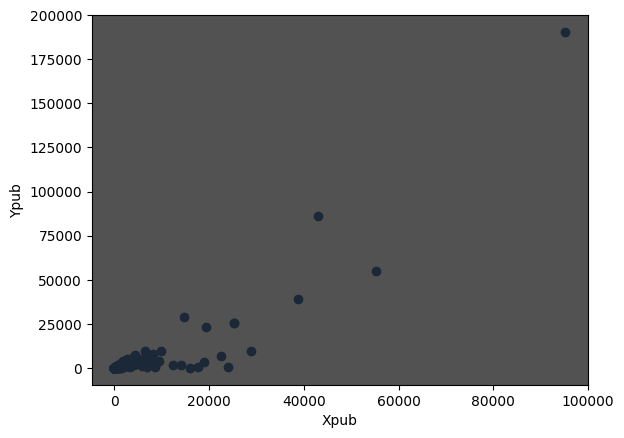

In [118]:
# Grafico

plt.scatter(Xpub, Ypub, color='#1B2838')
plt.xlabel("Xpub")
plt.ylabel("Ypub")
plt.rcParams['axes.facecolor'] = '#525252'
plt.plot

In [119]:
# Reshape de valores en X

xzpub = Xpub.reshape(-1,1)
xzpub,len(xzpub)

(array([[95245],
        [55204],
        [43074],
        ...,
        [    0],
        [    0],
        [    0]]),
 1136)

In [120]:
Xpub = Xpub.reshape(-1,1)

In [121]:
# Separando sets de training  y testing

Xpub_train, Xpub_test, Ypub_train, Ypub_test = train_test_split(Xpub,Ypub,train_size=0.8, random_state=600)

In [122]:
Xpub_train, len(Xpub_train)

(array([[ 1136],
        [    0],
        [    0],
        [    0],
        [  709],
        [    0],
        [    0],
        [    5],
        [    0],
        [    0],
        [    0],
        [    0],
        [   17],
        [ 2022],
        [   73],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [   58],
        [    0],
        [ 1911],
        [    0],
        [   28],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [   50],
        [  398],
        [    0],
        [    0],
        [  198],
        [    0],
        [  132],
        [    0],
        [  604],
        [    0],
        [    0],
        [    0],
        [ 2886],
        [ 1160],
        [    0],
        [    0],
        [ 1371],
        [ 2029],
        [    0],
        [    0],
        [    0],
        [   82],
        [    9],
        [ 1278],
        [    0],
        [  232],
        [    0

In [123]:
Xpub_test, len(Xpub_test)

(array([[ 3225],
        [  141],
        [   37],
        [    0],
        [    0],
        [  150],
        [  257],
        [    0],
        [  476],
        [  519],
        [    0],
        [    0],
        [ 1360],
        [ 2377],
        [    0],
        [    0],
        [    0],
        [ 1930],
        [ 7504],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [  438],
        [    0],
        [  221],
        [    0],
        [ 8495],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [  126],
        [    0],
        [  355],
        [   81],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [ 1102],
        [    0],
        [  276],
        [    0],
        [  282],
        [ 1854],
        [    0],
        [  712],
        [  648],
        [    0],
        [    0],
        [    0

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

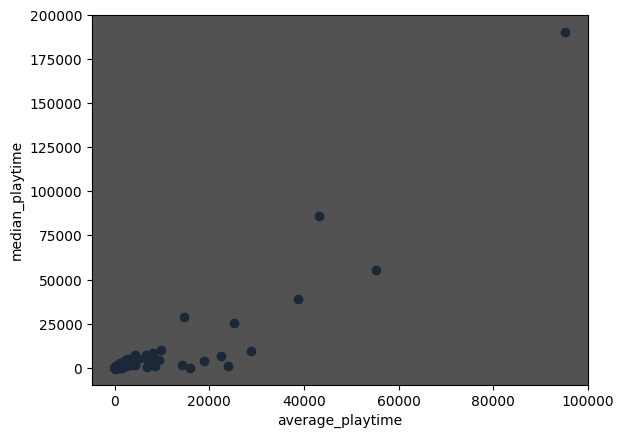

In [124]:
# Grafico data de training

plt.scatter(Xpub_train,Ypub_train, color='#1B2838')
plt.xlabel("average_playtime")
plt.ylabel("median_playtime")
plt.plot

In [125]:
xpublr = LinearRegression()
xpublr.fit(Xpub_train,Ypub_train)

LinearRegression()

In [126]:
# Cálculo de R Squared

xpublr.score(Xpub_train,Ypub_train)*100

81.43978772708252

In [127]:
# Predict de valores para testing

Ypub_predict = xpublr.predict(Xpub_test)
Ypub_predict

array([ 4.33312469e+03, -1.22621274e+02, -2.72879892e+02, -3.26337286e+02,
       -3.26337286e+02, -1.09618124e+02,  4.49748777e+01, -3.26337286e+02,
        3.61384853e+02,  4.23511013e+02, -3.26337286e+02, -3.26337286e+02,
        1.63858311e+03,  3.10793903e+03, -3.26337286e+02, -3.26337286e+02,
       -3.26337286e+02,  2.46211593e+03,  1.05154000e+04, -3.26337286e+02,
       -3.26337286e+02, -3.26337286e+02, -3.26337286e+02, -3.26337286e+02,
       -3.26337286e+02, -3.26337286e+02,  3.06482666e+02, -3.26337286e+02,
       -7.03772101e+00, -3.26337286e+02,  1.19471912e+04, -3.26337286e+02,
       -3.26337286e+02, -3.26337286e+02, -3.26337286e+02, -3.26337286e+02,
       -3.26337286e+02, -3.26337286e+02, -1.44293190e+02, -3.26337286e+02,
        1.86564730e+02, -2.09308938e+02, -3.26337286e+02, -3.26337286e+02,
       -3.26337286e+02, -3.26337286e+02, -3.26337286e+02,  1.26582615e+03,
       -3.26337286e+02,  7.24259715e+01, -3.26337286e+02,  8.10947380e+01,
        2.35231155e+03, -

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

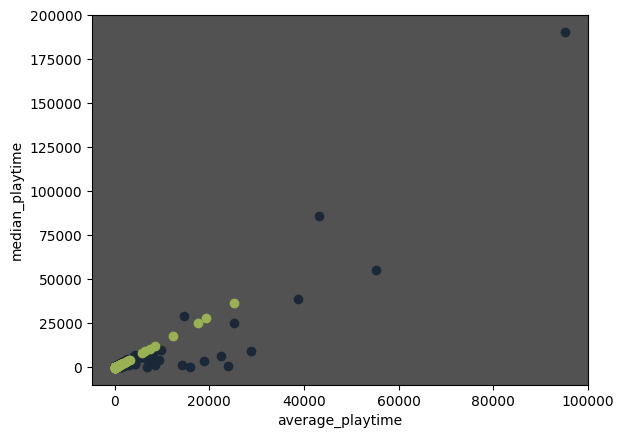

In [128]:
# Grafico training y predict

plt.scatter(Xpub_train,Ypub_train, color='#1B2838')
plt.scatter(Xpub_test,Ypub_predict, color='#99B053')
plt.xlabel("average_playtime")
plt.ylabel("median_playtime")
plt.plot

In [129]:
# Entrenando Decision Tree Classifier

xpubregressor = RandomForestRegressor()
xpubregressor.fit(Xpub_train, Ypub_train)
Ypub_pred = xpubregressor.predict(Xpub_test).round(0)

pubdft = pd.DataFrame({'Actual': Ypub_test, 'Predicted': Ypub_pred})
print(pubdft)

# Con mi modelo

print("R2 Score:" + str(r2_score(Ypub_test, Ypub_pred)))
print("MAE:" + str(mean_absolute_error(Ypub_test, Ypub_pred)))

     Actual  Predicted
0       444     2170.0
1       141      147.0
2        71       56.0
3         0        0.0
4         0        0.0
..      ...        ...
223      28       19.0
224     480      469.0
225     384      212.0
226     188      125.0
227       0        0.0

[228 rows x 2 columns]
R2 Score:0.5614602854457003
MAE:297.5877192982456


**La conclusión a la que se llega analizando la aplicación de modelos de ML sobre una pequeña muestra del dataset principal no parece mostrar diferencias en cuanto a la poca utilidad de las variables al momento de ser utilizadas para realizar predicciones, sino que en este caso la precisión de las predicciones se vio afectada negativamente como se puede apreciar en los resultados. El dataset trabajado resultó ser de gran utilidad al comenzar a trabajar con Data Wrangling pero no así con respecto a entrenamiento de modelos de ML y predicciones.**